<font size="5">**Notebook di introduzione generale al package *pandas* di Python**</font><br>

> (c) 2025 Antonio Michele Piemontese

Il package *pandas* di Python serve a gestire i **dataframe**.

In [2]:
# impostazione del TOGGLE BINARIO:
try:
    import google.colab                      # package disponibile SOLO in Google Colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

print("Running on Colab:", IN_COLAB)


# IMPORT dei package necessari (necessari sia in JN che in Colab):
from IPython.display import Image, display   # import dei package di incorporamento e visualizzazione immagine (una tantum)
                                             # Image e display sono entrambi necessari a Jupyter Notebook
                                             # Google Colab utilizza solo Image
import os                                    # necessario a Google Colab per vedere da una cella codice
                                             # i contenuti del 'content'

Running on Colab: False


In [164]:
import pandas as pd     # importazione in memoria del package pandas (già installato di default in Google Colab);
                        # non confondere la installazione di un package con la import: la prima installa SU DISCO e si fa una volta sola (alcuni package
                        # sono già pre-installati); la seconda carica il package IN MEMORIA e dunque va fatta ad ogni nuova esecuzione del notebook

In [165]:
df = pd.read_csv(filepath_or_buffer='Credit_ISLR.csv', sep=",")   # questa riga dà errore --> occorre fare l'upload del file csv nella session storage

Il file ***Credit*** è un famoso file bancario che contiene 400 clienti di carte di credito descritti lungo una decina di attributi. E' un file simulato negli anni '90 ed è molto usato per imparare python e pandas.

In [166]:
df.head()               # le prime 5 righe

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:
df.tail()               # le ultime 5 righe

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,400,400,18.701,5524,415,5,64,7,Female,No,No,Asian,966



---
pandas fornisce un insieme di funzioni chiamate **read_XXXX** per leggere file di molti formati. Vedi in proposito [questa chat](https://chatgpt.com/share/68e6379c-a2f4-8012-b0cd-615ff6a2ac74).

---

**Rimuoviamo** dal dataframe 'df' le colonne inutili:
- *Unnamed: 0*: inserita dalla funzione 'pd.read_csv'
- *ID*: un identificativo numerico del cliente presente nel file CSV. Numera da 1 anzichè da 0, come deve essere in Python; inoltre è ridondante rispetto all'indice che pandas crea in automatico (la prima colonna a sx in grassetto).

In [167]:
df.drop(columns=['Unnamed: 0','ID'],inplace=True)  # in-place = True rende l'operazione di drop PERSISTENTE (in memoria)

In [168]:
display(df)       # display è una FUNZIONE, non un metodo

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


La funzione 'display' visualizza le righe e colonne di un dataframe in formato **HTML / CSS** (a differenza della funzione 'print').

Come si vede, le due colonne "droppate" non sono più presenti nel dataframe.

La **classe** di un oggetto

In [169]:
type(df)              # la classe dell'oggetto --> è un dataframe perchè è stato creato con la funzione 'pd.read_csv' di pandas

pandas.core.frame.DataFrame

I datatype elementari (delle singole colonne):

In [170]:
df.dtypes

,0
Income,float64
Limit,int64
Rating,int64
Cards,int64
Age,int64
Education,int64
Gender,object
Student,object
Married,object
Ethnicity,object


Le dimensioni del dataframe con le relative cardinalità:

In [171]:
df.shape

(400, 11)

L'occupazione in byte del dataframe:

In [172]:
df.size

4400

**Cosa è un dataframe?**<br>
E' una TABELLA di righe e colonne **in memoria**. Non è la classica tabella SQL (su disco).

Vediamonne le **dimensioni** (con il relativo **size**):

In [ ]:
df.shape

(400, 11)

Il dataframe 'df' ha 2 dimemnsioni di size 400 e 11.

L'elenco dei data-type pandas **elementari** del 'df' (cioè delle singole colonne) è fornito dal metodo 'dtypes'.

In [ ]:
df.dtypes

,0
Education,int64
Income,float64
Limit,int64
Rating,int64
Cards,int64
Age,int64
Gender,category
Student,object
Married,object
Ethnicity,object


Quanto spazio in memoria (in byte) occupa il dataframe?

In [ ]:
df.size

4400

Il dataframe contiene valori mancanti? (detti **missing values** oppure **not available**). Si fa con il metodo 'isna' che funziona in questo modo:
- lavora in modo parrallelo su righe e colonne
- esegue il test sulla **singola cella**
- e quindi restituisce una matrice di booleani (True oppure False) con l'esito del test per ogni cella.

In [ ]:
df.isna()

,Education,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance_card
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


Occorre individuare le celle con **True** (i MV). Per dataset medio-grandi questa operazione è di fatto impossibile.

Per fortuna, il valore booleano True è memorizzato nei PC come 1, ed il valore False come 0.

In [ ]:
df.isna().sum()

,0
Education,0
Income,0
Limit,0
Rating,0
Cards,0
Age,0
Gender,0
Student,0
Married,0
Ethnicity,0


Ora un pò di **analisi** di questo dataset:

In [ ]:
df.info()          # fornisce una SINTESI di informazioni sul dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


`float64` è un numero a virgola  mobile in doppia precisione (cioè con i decimali e allocato su 64 bit).<br>
`int64` è un numero intero allocato su 64 bit<br>
`object` è una stringa alfanumerica


Possiamo ottenere alcune di queste info separatamente, con comandi differenti:

In [ ]:
display(df.columns.tolist())
display(df.dtypes)
print('\n','numero di NA complessivo: ',df.isna().sum().sum().item(),'\n')
print('byte del size: ', df.size)

['Education',
 'Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Gender',
 'Student',
 'Married',
 'Ethnicity',
 'Balance_card']

,0
Education,int64
Income,float64
Limit,int64
Rating,int64
Cards,int64
Age,int64
Gender,category
Student,object
Married,object
Ethnicity,object



 numero di NA complessivo:  0 

byte del size:  4400


In [ ]:
df.describe()   # calcola le statistiche di base per le SOLE colonne NUMERICHE (int, float, ecc)

,Education,Income,Limit,Rating,Cards,Age,Balance_card
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,13.450000,45.218885,4735.600000,354.940000,2.957500,55.667500,520.015000
std,3.125207,35.244273,2308.198848,154.724143,1.371275,17.249807,459.758877
min,5.000000,10.354000,855.000000,93.000000,1.000000,23.000000,0.000000
25%,11.000000,21.007250,3088.000000,247.250000,2.000000,41.750000,68.750000
50%,14.000000,33.115500,4622.500000,344.000000,3.000000,56.000000,459.500000
75%,16.000000,57.470750,5872.750000,437.250000,4.000000,70.000000,863.000000
max,20.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,1999.000000


In [ ]:
round(df.describe(),2)

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,45.22,4735.60,354.94,2.96,55.67,13.45,520.02
std,35.24,2308.20,154.72,1.37,17.25,3.13,459.76
min,10.35,855.00,93.00,1.00,23.00,5.00,0.00
25%,21.01,3088.00,247.25,2.00,41.75,11.00,68.75
50%,33.12,4622.50,344.00,3.00,56.00,14.00,459.50
75%,57.47,5872.75,437.25,4.00,70.00,16.00,863.00
max,186.63,13913.00,982.00,9.00,98.00,20.00,1999.00


In [ ]:
df['Income'].median()    # mediana molto più bassa della media; come mai? indaghiamo...

33.1155

<Axes: >

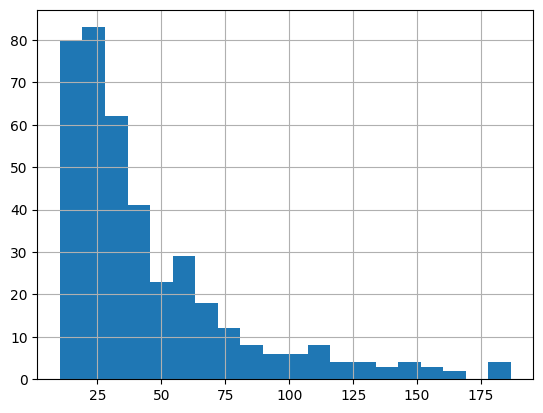

In [ ]:
df['Income'].hist(bins=20)

Il metodo 'describe', come molti altri metodi e funzioni di pandas e python, utilizza il famoso **funzionamento VETTORIALE**, nel quale le colonne sono elaborate in modo **parallelo ed indipendente**.

In linguaggi tradizionali, anche ad oggetti come Java, C#, ecc, il metodo 'describe' - se applicato a tutto il dataframe - sarebbe implementato con un ciclo 'for' (una iterazione per colonna).

Il funzionamento vettoriale permette inoltre di scrivere **codice più compatto e leggibile**

In [ ]:
print(df.shape)
print(df['Income'].shape)
print(type(df['Income']))

print(df[['Income']].shape)
print(type(df[['Income']]))

(400, 11)
(400,)
<class 'pandas.core.series.Series'>
(400, 1)
<class 'pandas.core.frame.DataFrame'>


pandas ha due tipi di data-type aggregati: il dataframe (righe e colonne) e **la serie**, composta da un vettore (serie di elementi).

Queste 2 classi hanno metodi differenti! (a parte alcuni: head, tail, shape, describe, ecc)

<Axes: >

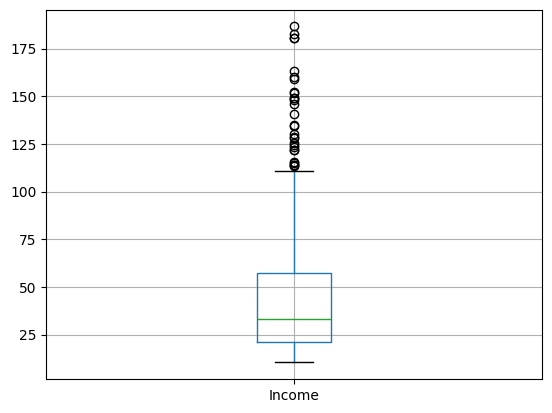

In [ ]:
df[['Income']].boxplot()

I baffi esprimono l'[IQR](https://it.wikipedia.org/wiki/Scarto_interquartile) (Inter Quartile Range), cioè la differenza tra Q3 (75%) e Q1 (25%), moltiplicato per 1.5. E' una convenzione che permette di inviduare eventuali outlier, cioè valori "anomali".

Calcoliamo la fondamentale matrice di correlazione

In [ ]:
df.corr()    # --> dà errore perchè le correlazioni sono calcolabili solo tra coppie di variabili numeriche

ValueError: could not convert string to float: ' Male'

In [ ]:
df.select_dtypes('number')

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331
...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560
396,13.364,3838,296,5,65,17,480
397,57.872,4171,321,5,67,12,138
398,37.728,2525,192,1,44,13,0


In [ ]:
df.select_dtypes('object')

,Gender,Student,Married,Ethnicity
0,Male,No,Yes,Caucasian
1,Female,Yes,Yes,Asian
2,Male,No,No,Asian
3,Female,No,No,Asian
4,Male,No,Yes,Caucasian
...,...,...,...,...
395,Male,No,Yes,Caucasian
396,Male,No,No,African American
397,Female,No,Yes,Caucasian
398,Male,No,Yes,Caucasian


In [ ]:
round(df.select_dtypes('number').corr(),2)

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.00,0.79,0.79,-0.02,0.18,-0.03,0.46
Limit,0.79,1.00,1.00,0.01,0.10,-0.02,0.86
Rating,0.79,1.00,1.00,0.05,0.10,-0.03,0.86
Cards,-0.02,0.01,0.05,1.00,0.04,-0.05,0.09
Age,0.18,0.10,0.10,0.04,1.00,0.00,0.00
Education,-0.03,-0.02,-0.03,-0.05,0.00,1.00,-0.01
Balance,0.46,0.86,0.86,0.09,0.00,-0.01,1.00


La matrice di correlazione è quadrata e simmetrica. Sulla diagonale principale ci sono tutti 1 -> la correlazione infatti è un coefficiente tra 0 e 1 (se positiva) e tra 0 e -1 (se negativa).

Vogliamo estrarre solo la matrice traingolare superiore.

In [ ]:
import numpy as np    #  un altro package di python fondamentale;
                      #  serve per molti calcoli numerici;
                      #  per convenzione è importato come 'np'

correlation_matrix = df.select_dtypes('number').corr()
upper_triangular_matrix = np.triu(correlation_matrix)
display(upper_triangular_matrix)   # numpy lavora internamente con le ARRAY (numeriche) e non i dataframe
                                   # quindi restituisce una array (una matrice numerica) SENZApiùi nomi delle colonne
mat_corr_upper = pd.DataFrame(upper_triangular_matrix, columns=df.select_dtypes('number').columns)
                                   # 'pd.DataFrame' è una FUNZIONE con la lista degli argomenti tra ();
                                   # invece 'select_dtypes' e 'columns' sono 2 METODI della classe DataFrame e si scrivono A VALLE dell'oggetto
display(round(mat_corr_upper,2))

array([[ 1.        ,  0.79208834,  0.79137763, -0.01827261,  0.1753384 ,
        -0.02769198,  0.46365646],
       [ 0.        ,  1.        ,  0.99687974,  0.01023133,  0.10088792,
        -0.02354853,  0.86169727],
       [ 0.        ,  0.        ,  1.        ,  0.05323903,  0.103165  ,
        -0.03013563,  0.86362516],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.04294829,
        -0.05108422,  0.08645635],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.00361928,  0.00183512],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        , -0.00806158],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ]])

,Income,Limit,Rating,Cards,Age,Education,Balance
0,1.0,0.79,0.79,-0.02,0.18,-0.03,0.46
1,0.0,1.00,1.00,0.01,0.10,-0.02,0.86
2,0.0,0.00,1.00,0.05,0.10,-0.03,0.86
3,0.0,0.00,0.00,1.00,0.04,-0.05,0.09
4,0.0,0.00,0.00,0.00,1.00,0.00,0.00
5,0.0,0.00,0.00,0.00,0.00,1.00,-0.01
6,0.0,0.00,0.00,0.00,0.00,0.00,1.00


La seguente cella è stata generata dall'**assistente AI**: avevamo chiesto come NON visualizzare la matrice triangolare inferiore (neanche gli 0)

In [ ]:
# Hide the lower triangular part (including the diagonal)
def hide_lower_triangular(val):
    return 'visibility: hidden' if val == 0 else ''

# Apply the styling to the upper triangular matrix
styled_matrix = mat_corr_upper.style.map(hide_lower_triangular)
display(styled_matrix)


,Income,Limit,Rating,Cards,Age,Education,Balance
0,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
1,0.000000,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
2,0.000000,0.000000,1.000000,0.053239,0.103165,-0.030136,0.863625
3,0.000000,0.000000,0.000000,1.000000,0.042948,-0.051084,0.086456
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.003619,0.001835
5,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.008062
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


L'indice di correlazione tra Rating e Limit è altissimo (0.9968). Vuol dire che c'è una fortissima **associazione** tra le due variabili, non necessariamente un rapporto causa effetto. Un esempio migliore è la correlazione tra Balance e Limit (0.86): il limite è deciso dalla banca unicamente sulla base del Balance? Probabilmente, no.

Se ci fosse un rapporto causa-effetto tra due variabili correlate (ad esempio Balance e Limit), le troveremmo correlate in OGNI campione di questa popolazione di questa banca.

In QUESTO campione abbiamo rilevato una semplice ASSOCIAZIONE, che potrebbe benissimo non ripetersi in un altro campione.

In italiano e in inglese: correlazione vuol dire rapporto "causa-effetto". L'uomo della srrada intende così la correlazione.

**Rename** di un nome colonna

In [173]:
df.rename(columns={'Balance': 'Balance_card'}, inplace=True)
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance_card
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


**Campionamento casuale**:

In [ ]:
df.sample(n=10)   # utile per esaminare il dataset

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance_card
214,34.909,5289,410,2,62,16,Female,No,Yes,Caucasian,681
303,44.061,4970,352,1,79,11,Male,No,Yes,African American,414
133,21.455,5829,427,4,80,12,Female,No,Yes,African American,1018
73,23.989,4523,338,4,31,15,Male,No,No,Caucasian,601
360,53.566,5891,434,4,82,10,Female,No,No,Caucasian,712
228,69.165,4668,341,2,34,11,Female,No,No,African American,156
307,75.406,3874,298,3,41,14,Female,No,Yes,Asian,0
24,10.742,1757,156,3,57,15,Female,No,No,Caucasian,0
35,23.350,2558,220,3,49,12,Female,Yes,No,Caucasian,419
109,13.561,3261,279,5,37,19,Male,No,Yes,Asian,297


In [ ]:
df.sample(n=10, random_state=1000) # con seme, per garantire la "riproducibilità dei risultati"

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance_card
220,44.847,5765,437,3,53,13,Female,Yes,No,Asian,1246
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
230,33.214,5137,387,3,59,9,Male,No,No,African American,661
55,32.916,1786,154,2,60,8,Female,No,Yes,Asian,0
312,27.825,5227,386,6,63,11,Male,No,Yes,Caucasian,823
122,62.602,7056,481,1,84,11,Female,No,No,Caucasian,904
281,36.142,1852,183,3,33,13,Female,No,No,African American,0
371,39.116,2150,173,4,75,15,Male,No,No,Caucasian,0
365,113.772,6442,489,4,69,15,Male,Yes,Yes,Caucasian,790
32,134.181,7838,563,2,48,13,Female,No,No,Caucasian,526


***Shuffling*** = rimescolamento (NON per serie temporali).<br>
E' buona norma RIMESCOLARE un dataframe prima di applicare ad esso un modello di Machine Learning, poichè il dataframe potrebbe essere ORDINATO rispetto a qualche colonna, e cioò può essere un problema per alcuni modelli.<br>
L'ispezione manuale (visiva) degli eventuali ordinamenti è possibile solo se il dataframe ha poche colonne.


In [ ]:
n = df.shape[0]                           # il numero di righe del dataframe
df_sample = df.sample(n,random_state=1)   # il trucco è qua, il campionamento è fatto su TUTTE le righe,
                                          # SENZA RI-IMMISSIONE del cliente estratto nell'urna (il dataframe),
                                          #  e quindi costituisce uno shuffling
display(df_sample)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance_card
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
125,27.578,2531,195,1,34,15,Female,No,Yes,Caucasian,0
328,41.192,3673,297,3,54,16,Female,No,Yes,Caucasian,121
339,149.316,10278,707,1,80,16,Male,No,No,African American,1107
172,76.348,4697,344,4,60,18,Male,No,No,Asian,108
...,...,...,...,...,...,...,...,...,...,...,...
255,58.063,4221,304,3,50,8,Male,No,No,African American,118
72,22.939,4923,355,1,47,18,Female,No,Yes,Asian,663
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
235,10.503,2923,232,3,25,18,Female,No,Yes,African American,191


Tabelle di contingenza (**frequenze**)

In [ ]:
# df['Gender'].value_counts
df[['Gender']].value_counts()

,count
Gender,
Female,207
Male,193


Vediamo ora la **cross-reference**, cioè la tabella degli incroci tra due colonne (anche detta **tabella di conmtingenza a 2 fattori**.)

In [ ]:
# questo NON è un METODO ma è una FUNZIONE
# un metodo si può applicare solo agli oggetti (cioè variabili) di una CERTA CLASSE,
# il concetto di funzione è più ampio e meno restrittivo
# 'pd.crosstab' è una FUNZIONE
pd.crosstab(index=df['Gender'],columns=df['Married'])

Married,No,Yes
Gender,,
Male,76,117
Female,79,128


Gli **indici**:

In [ ]:
df.index         # quello CORRENTE, non necessariamente quello INIZIALE creato automaticamente
                 # da pandas (un progressivo da 0 in poi)
                 # l'indice serve a velocizzare gli accessi.

RangeIndex(start=0, stop=400, step=1)

Possiamo modificare l'indice, ad esempio per la colonna 'Education'

In [ ]:
df.set_index('Education',inplace=True)
df

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance_card
Education,,,,,,,,,,,,
11,1,1,14.891,3606,283,2,34,Male,No,Yes,Caucasian,333
15,2,2,106.025,6645,483,3,82,Female,Yes,Yes,Asian,903
11,3,3,104.593,7075,514,4,71,Male,No,No,Asian,580
11,4,4,148.924,9504,681,3,36,Female,No,No,Asian,964
16,5,5,55.882,4897,357,2,68,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
13,396,396,12.096,4100,307,3,32,Male,No,Yes,Caucasian,560
17,397,397,13.364,3838,296,5,65,Male,No,No,African American,480
12,398,398,57.872,4171,321,5,67,Female,No,Yes,Caucasian,138


In [ ]:
df.index        # fornisce l'elenco dei valori (tutti e 400!) del NUOVO indice corrente (Education)

Index([11, 15, 11, 11, 16, 10, 12,  9, 13, 19,
       ...
       15, 15, 10, 13,  8, 13, 17, 12, 13,  7],
      dtype='int64', name='Education', length=400)

In [ ]:
df.index.is_unique   # test booleano sulla unicità dei valori dell'indice corrente

False

In [ ]:
df.index.unique()    # lista dei valori dell'indice unici

Index([11, 15, 16, 10, 12, 9, 13, 19, 14, 7, 17, 8, 5, 20, 18, 6], dtype='int64', name='Education')

Una colonna indicizzata non è più subsettabile:

In [ ]:
df['Education'].head()

KeyError: 'Education'

Il bottone "Spiega errore" ha fornito la seguente risposta:<br>
> *L'errore KeyError: 'Education' nella cella corrente si è verificato perché la colonna 'Education' è stata impostata come indice del DataFrame utilizzando **df.set_index('Education', inplace=True)**. Una volta che una colonna diventa l'indice, non è più accessibile come una normale colonna utilizzando la sintassi standard df['nome_colonna'].*

> *Per accedere all'indice, puoi usare **df.index**. Per visualizzare i primi valori dell'indice, puoi usare **df.index.head()**.*

> *Se hai bisogno di accedere nuovamente a 'Education' come una normale colonna, puoi resettare l'indice usando **df.reset_index(inplace=True**).*

In [ ]:
df.index.head()      # suggerito da Gemini sopra --> un'allucinazione!

Index([11, 15, 11, 11, 16, 10, 12,  9, 13, 19,
       ...
       15, 15, 10, 13,  8, 13, 17, 12, 13,  7],
      dtype='int64', name='Education', length=400)

Uno dei vantaggi dell'argomento 'inplace=True' (disponibile per molti metodi pandas) è di **evitare la proliferazione inutile di dataframe**. Un'alternativa sarebbe infatti:
df2 = df.copy()

In [ ]:
df2 = df       # non crea una copia, crea solo un secondo puntatore al medesimo dataframe - può creare problemi, nel senso che, se modifico  'df' per qualche aspetto
               # risulta modificato anche 'df2'

df2 = df.copy  # crea una copia del primo dataframe, AUTONOMA --> consumo di memoria se i dataframe sono grandi

La proliferazione di dataframe inoltre confonde e rende più difficile la comprensione del codice.

**Quali sono i criteri per decidere la colonna (o le colonne) da indicizzare?**<br>
I criteri per decidere quale colonna del dataframe df ti conviene indicizzare dipendono principalmente da come intendi accedere ai dati. Ecco i punti chiave da considerare:
- **Accesso frequente e veloce per valore**: Se prevedi di cercare o recuperare righe molto spesso in base ai valori di una specifica colonna (ad esempio, cercare clienti per ID, o prodotti per codice), rendere quella colonna l'indice può velocizzare notevolmente queste operazioni. Gli indici in pandas funzionano in modo simile agli indici nei database, creando una struttura dati ottimizzata per le ricerche.
- **Unicità dei valori**: Se la colonna contiene valori univoci per ogni riga (come un ID cliente o un codice fiscale), è un ottimo candidato per diventare l'indice. Un indice univoco garantisce che ogni riga sia identificata in modo non ambiguo.
- **Ordinamento dei dati**: Se hai bisogno di accedere frequentemente a intervalli di righe basati sui valori di una colonna (ad esempio, tutte le transazioni in un determinato intervallo di date se la colonna è una data), impostare quella colonna come indice e ordinarla può migliorare le prestazioni.
- **Join e merge** (RARO): Quando esegui operazioni di join o merge tra dataframe, se i dataframe sono indicizzati sulla colonna che usi per il join, l'operazione sarà generalmente più veloce.
- **Significato dei dati**: A volte, una colonna ha un significato intrinseco che la rende un buon candidato per l'indice, anche se non è strettamente necessario per le prestazioni. Ad esempio, in un dataframe di serie temporali, la colonna della data/ora è quasi sempre l'indice naturale.

**Quando NON conviene indicizzare?**
- Se la colonna ha **molti valori duplicati** e non hai bisogno di accedere rapidamente a gruppi specifici basati su quei valori.
- Se modifichi frequentemente l'indice del dataframe, poiché la creazione e la gestione dell'indice hanno **un costo computazionale**.
- Se **l'ordine delle righe ORIGINALE è importante** e non vuoi che venga modificato dall'ordinamento implicito che può derivare dall'impostazione di un indice.

Nel caso del tuo dataframe 'df', colonne come 'ID' (se fosse ancora presente e univoca) o forse 'Education' (se volessi raggruppare o accedere spesso per livello di istruzione) potrebbero essere considerate come indici, **a seconda dell'analisi che intendi svolgere**.

> Tuttavia, per molte analisi esplorative di base, l'indice numerico di default è perfettamente adeguato.


Possiamo resettare l'indice a quello originale:

In [ ]:
df.reset_index(inplace=True)  # come sempre, l'argomento 'inplace=True' NON visualizza nulla ma modifica l'oggetto in memoria

In [ ]:
df.head()

,Education,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance_card
0,11,14.891,3606,283,2,34,Male,No,Yes,Caucasian,333
1,15,106.025,6645,483,3,82,Female,Yes,Yes,Asian,903
2,11,104.593,7075,514,4,71,Male,No,No,Asian,580
3,11,148.924,9504,681,3,36,Female,No,No,Asian,964
4,16,55.882,4897,357,2,68,Male,No,Yes,Caucasian,331


Cambiamo argomento, vediamo i metodi *style*:

Il metodo `style`, che ha molti **sottometodi**; vediamo i principali:

In [ ]:
df.select_dtypes('number').head().style.map(lambda v: 'color: red' if v < 20 else '')
                                                 # questa funzione lambda evidenzia in ROSSO i valori (di tutte le colonne NUMERICHE) < 20)
                                                 # notate l'applicazione IN CASCATA di 3 metodi

,Education,Income,Limit,Rating,Cards,Age,Balance_card
0,11,14.891000,3606,283,2,34,333
1,15,106.025000,6645,483,3,82,903
2,11,104.593000,7075,514,4,71,580
3,11,148.924000,9504,681,3,36,964
4,16,55.882000,4897,357,2,68,331


Una applicazione più frequente del metodo 'style' è **sulla singola colonna con cutoff specifico per colonna**
:

In [ ]:
df[['Income']].head().style.map(lambda v: 'color: red' if v > 100 else '')

,Income
0,14.891000
1,106.025000
2,104.593000
3,148.924000
4,55.882000


NB. df[['Income']] è un dataframe. Invece,df['Income'] è una serie, che non dispone del metodo style --> errore!!

In [ ]:
df['Income'].head().style.map(lambda v: 'color: red' if v > 100 else '')   # --> Series' object has no attribute 'style'

AttributeError: 'Series' object has no attribute 'style'

Altri tipi di uso di style:

In [ ]:
display(df.select_dtypes('number').head(10).style.bar(subset=['Income'], color='lightblue'))
df.select_dtypes('number').head(10).style.bar(subset=['Income', 'Balance_card'], color='#d65f5f')

,Education,Income,Limit,Rating,Cards,Age,Balance_card
0,11,14.891000,3606,283,2,34,333
1,15,106.025000,6645,483,3,82,903
2,11,104.593000,7075,514,4,71,580
3,11,148.924000,9504,681,3,36,964
4,16,55.882000,4897,357,2,68,331
5,10,80.180000,8047,569,4,77,1151
6,12,20.996000,3388,259,2,37,203
7,9,71.408000,7114,512,2,87,872
8,13,15.125000,3300,266,5,66,279
9,19,71.061000,6819,491,3,41,1350


,Education,Income,Limit,Rating,Cards,Age,Balance_card
0,11,14.891000,3606,283,2,34,333
1,15,106.025000,6645,483,3,82,903
2,11,104.593000,7075,514,4,71,580
3,11,148.924000,9504,681,3,36,964
4,16,55.882000,4897,357,2,68,331
5,10,80.180000,8047,569,4,77,1151
6,12,20.996000,3388,259,2,37,203
7,9,71.408000,7114,512,2,87,872
8,13,15.125000,3300,266,5,66,279
9,19,71.061000,6819,491,3,41,1350


In [ ]:
df.head().style.background_gradient(cmap='coolwarm')  # lo schema di colori qui scelto visualizza, per OGNI colonna NUMERICA del dataframe, in gradazioni di rosso i valori
                                                      # più alti e in gradazioni di blu quelli più bassi (non in assoluto, ma relativamente ad ogni colonna)

,Education,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance_card
0,11,14.891000,3606,283,2,34,Male,No,Yes,Caucasian,333
1,15,106.025000,6645,483,3,82,Female,Yes,Yes,Asian,903
2,11,104.593000,7075,514,4,71,Male,No,No,Asian,580
3,11,148.924000,9504,681,3,36,Female,No,No,Asian,964
4,16,55.882000,4897,357,2,68,Male,No,Yes,Caucasian,331


In [ ]:
df.select_dtypes('number').style.highlight_max(axis=0,color='red')  # identifica (qui in rosso) il valore MAX di ogni colonna

,Education,Income,Limit,Rating,Cards,Age,Balance_card
0,11,14.891000,3606,283,2,34,333
1,15,106.025000,6645,483,3,82,903
2,11,104.593000,7075,514,4,71,580
3,11,148.924000,9504,681,3,36,964
4,16,55.882000,4897,357,2,68,331
5,10,80.180000,8047,569,4,77,1151
6,12,20.996000,3388,259,2,37,203
7,9,71.408000,7114,512,2,87,872
8,13,15.125000,3300,266,5,66,279
9,19,71.061000,6819,491,3,41,1350


Con il metodo `style` possiamo ora **visualizzare meglio la matrice di correlazione**:

In [ ]:
df.select_dtypes('number').corr().style.background_gradient(cmap='coolwarm')

,Education,Income,Limit,Rating,Cards,Age,Balance_card
Education,1.000000,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,-0.008062
Income,-0.027692,1.000000,0.792088,0.791378,-0.018273,0.175338,0.463656
Limit,-0.023549,0.792088,1.000000,0.996880,0.010231,0.100888,0.861697
Rating,-0.030136,0.791378,0.996880,1.000000,0.053239,0.103165,0.863625
Cards,-0.051084,-0.018273,0.010231,0.053239,1.000000,0.042948,0.086456
Age,0.003619,0.175338,0.100888,0.103165,0.042948,1.000000,0.001835
Balance_card,-0.008062,0.463656,0.861697,0.863625,0.086456,0.001835,1.000000


**Nota sul metodo 'style'**:<br>
La valutazione 'alto' o 'basso' è sempre **relativa** agli altri valori di QUELLA colonna singola, valutata **indipendentemente** dalle altre.

Cambiamo argomento. Passiamo al **subsetting**, cioè l'estrazione da un dataframe o da una serie pandas di un **sottoinsieme di righe e/o colonne**.<br>
Abbiamo già visto numerosi esempi di **subsetting di colonna**.<br>
Vediamo ora il subsetting di **riga**:

In [ ]:
df[1:3]        # attenzione a 2 cose: a. python conta da 0, b. l'estremo superiore non è (n), ma (n+1)

,Education,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance_card
1,15,106.025,6645,483,3,82,Female,Yes,Yes,Asian,903
2,11,104.593,7075,514,4,71,Male,No,No,Asian,580


In [ ]:
df['Income'][1:3]        # subsetting di colonna e riga

,Income
1,106.025
2,104.593


> Il subsetting permette di **focalizzare** l'analisi su una **porzione** del dataframe.

**Trasformazione** di una variabile categorica (da numerica a fattore).<br>
La variabile 'gender' (come anche le variabili 'Married', 'Student', ecc) è stata caricata in pandas come 'object' (stringa). E' meglio trasformare le variabili 'gender', 'married', ecc in variabili CATEGORICHE.<br>
Nella Data Science ci sono infatti due tipi di variabili:
- numeriche
- categoriche

La differenza è che le prime possono assumere un numero INFINITO di valori, le secondo un numero FINITO.


In [ ]:
df['Gender'] = df['Gender'].astype('category')
df.dtypes

,0
Education,int64
Income,float64
Limit,int64
Rating,int64
Cards,int64
Age,int64
Gender,category
Student,object
Married,object
Ethnicity,object


In [ ]:
df.select_dtypes(['category'])

,Gender
0,Male
1,Female
2,Male
3,Female
4,Male
...,...
395,Male
396,Male
397,Female
398,Male


**Ordinamenti**:

In [ ]:
df.sort_values(by = 'Income', ascending = True,inplace=False) # senza 'inplace=True', altrimenti diventa permanente;

,Education,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance_card
58,17,10.354,3480,281,2,70,Male,No,Yes,Caucasian,333
250,18,10.363,2430,191,2,47,Female,No,Yes,Asian,0
199,7,10.403,4159,310,3,43,Male,No,Yes,Asian,571
235,18,10.503,2923,232,3,25,Female,No,Yes,African American,191
262,13,10.588,4049,296,1,66,Female,No,Yes,Caucasian,465
...,...,...,...,...,...,...,...,...,...,...,...
275,14,163.329,8732,636,3,50,Male,No,Yes,Caucasian,529
261,8,180.379,9310,665,3,67,Female,Yes,Yes,Asian,1050
355,8,180.682,11966,832,2,58,Female,No,Yes,African American,1405
323,17,182.728,13913,982,4,98,Male,No,Yes,Caucasian,1999


In [ ]:
df.head()

,Education,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance_card
0,11,14.891,3606,283,2,34,Male,No,Yes,Caucasian,333
1,15,106.025,6645,483,3,82,Female,Yes,Yes,Asian,903
2,11,104.593,7075,514,4,71,Male,No,No,Asian,580
3,11,148.924,9504,681,3,36,Female,No,No,Asian,964
4,16,55.882,4897,357,2,68,Male,No,Yes,Caucasian,331


**Raggruppamenti**: solo sulle colonne <u>numeriche</u>, applicando ad ogni gruppo una <u>funzione statistica</u> (media, mediana, ecc)

In [ ]:
df.select_dtypes('number').groupby(by='Age').mean()

,Education,Income,Limit,Rating,Cards,Balance_card
Age,,,,,,
23,7.000000,24.3140,3409.000000,270.000000,2.000000,194.000000
24,11.666667,34.7740,3561.666667,275.000000,2.333333,377.333333
25,14.857143,21.1970,4166.428571,317.428571,3.142857,577.142857
26,16.000000,16.4790,5435.000000,388.000000,2.000000,937.000000
27,17.500000,32.3915,3532.500000,268.500000,2.000000,146.000000
...,...,...,...,...,...,...
86,16.000000,88.8300,4952.000000,360.000000,4.000000,15.000000
87,8.000000,89.6245,8749.000000,620.000000,2.500000,1234.500000
89,17.000000,123.2990,8376.000000,610.000000,2.000000,1259.000000


Se ai gruppi si applica un metodo non statistico (ad es. 'head()') la group_by non viene eseguita (provare).

Se ai gruppi non viene applicata nessuna funzione, non sono visualizzati risultati (provare).

La **standardizzazione** dei dati NUMERICI è spesso usata nella Data Science. Serve a trasformare una o più colonne NUMERICHE del dataframe nel range -6 +6 con media 0. Cioè, in altre parole, serve a **ricondurre tutte le colonne ad una stessa scala**.

La seguente cella utilizza la famosa libreria [**scikit-learn**](https://scikit-learn.org/stable/) per il Machine Learning in Python e la funzione *scale* del modulo *pre-processing*:

In [ ]:
import numpy as np                                        # numpy, pandas, matplotlib, ecc sono package STANDALONE e quindi si importano a se

from sklearn import preprocessing                         # scikit-learn è molto GRANDE e contiene molti moduli - si importa solo il modulo 'pre-processing'
                                                          # che contiene MOLTE funzioni di pre-elaborazione


np.set_printoptions(suppress=False)                       # sopprime l'uso della notazione scientifica per piccoli numeri: # imposta la precisione dell'output della mantissa
                                                          # (se tutte le cifre decimali danno fastidio).

arr_std = preprocessing.scale(df.select_dtypes('number')) # la standardizzazione si può fare solo su colonne numeriche

print(type(arr_std))                                      # numpy ha preso un dataframe pandas in input e ha restituito una array numpy
print(arr_std.shape)                                      # il metodo 'shape' (le dimensioni dell'oggetto) è uno dei pochi disponibili sia in pandas che numpy

arr_std                                                   # --> l'elenco dei 400 clienti (con 7 colonne numeriche) STANDARDIZZATI

<class 'numpy.ndarray'>
(400, 7)


array([[-0.78492991, -0.86158299, -0.48999879, ..., -0.6991298 ,
        -1.2576741 , -0.40727698],
       [ 0.49658831,  1.72743711,  0.82826106, ...,  0.03103187,
         1.5284506 ,  0.83405596],
       [-0.78492991,  1.68675551,  1.01478681, ...,  0.76119355,
         0.88996369,  0.13063396],
       ...,
       [-0.46455035,  0.35946155, -0.24491264, ...,  1.49135522,
         0.65778663, -0.83194351],
       [-0.1441708 , -0.21280808, -0.95891584, ..., -1.42929148,
        -0.67723146, -1.13247675],
       [-2.06644812, -0.75334493,  0.34199278, ...,  1.49135522,
         0.48365384,  0.97125591]])

In [ ]:
df.head()

,Education,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance_card
0,11,14.891,3606,283,2,34,Male,No,Yes,Caucasian,333
1,15,106.025,6645,483,3,82,Female,Yes,Yes,Asian,903
2,11,104.593,7075,514,4,71,Male,No,No,Asian,580
3,11,148.924,9504,681,3,36,Female,No,No,Asian,964
4,16,55.882,4897,357,2,68,Male,No,Yes,Caucasian,331


Un dataset standardizzato NON è più comprensibile all'utente, ma è utile e comodo in molti casi. Vediamone uno:

<Axes: >

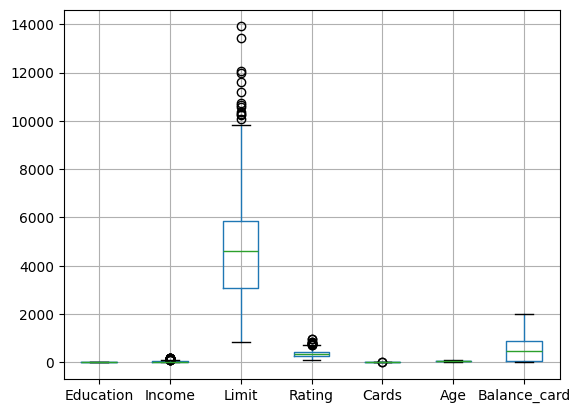

In [ ]:
df.boxplot()                    # boxplot comparato fianco a fianco di TUTTE le colonne NUMERICHE del dataframe
                                # un SOLO comando, senza ciclo di for, grazie al funzionamento VETTORIALE (cioè parallelo) di pandas

Poichè le scale delle varie colonne sono **molto differenti** la comparazione è impossibile. Un semplice modo per risolvere questo problema è visualizzare i dati standardizzati.

Siccome le array numpy non hanno il metodo 'boxplot' dobbiamo prima trasformare l'array numpy in un dataframe pandas.

<Axes: >

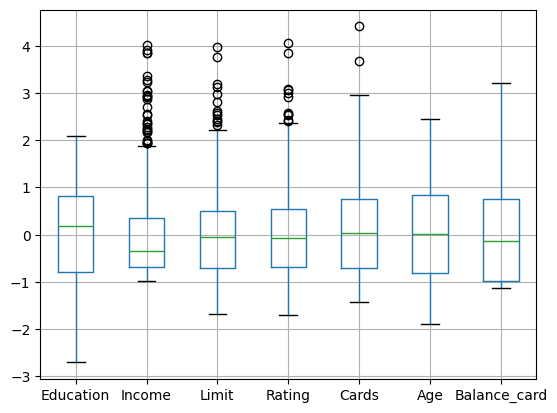

In [ ]:
# creiamo un nuovo dataframe, i nomi di colonna li dobbiamo prendere dal dataframe numerico originario.
# le array numpy non hanno infatti i nomi colonna, nel senso che sono andati persi quando prima abbiamo chiamato
# la funzione 'scale'
df_comp = pd.DataFrame(arr_std, columns=df.select_dtypes('number').columns)
df_comp.boxplot()

I boxplot sono ora confrontabili perchè **sulla stessa scala**. Vediamo:
- quali colonne hanno  outlier
- quali colonne hanno una escursione di valori maggiore
- quali colonne sono distribuite in modo simmetrico oppure no
- ecc

---
Una array di numpy è un oggetto **multi-dimensionale** (un vettore, una matrice, un cubo --> un tensore), nel quale le celle hanno tutte lo stesso datatype.<br>
I dataframe pandas sono **eterogenei**, cioè ogni colonna può avere il suo data-type. Le array numpy sono **omogenee**, in genere numeriche.

---

Le **serie**

In [ ]:
s = pd.Series([10,2,23,4])
s

,0
0,10
1,2
2,23
3,4


In [ ]:
type(s)

pandas.core.series.Series

In [ ]:
s.shape

(4,)

In [ ]:
s.index

RangeIndex(start=0, stop=4, step=1)

Le colonne di un dataframe sono 'serie'. In altri termini, un dataframe pandas è la somma di tante colonne:

In [ ]:
type(df['Income'])

pandas.core.series.Series

dataframe e serie hanno molti metodi differenti (alcuni in comuni)

In [ ]:
display(s.shape)
display(df.shape)

(4,)

(400, 11)

In [ ]:
s.boxplot  # ce l'ha solo il dataframe

AttributeError: 'Series' object has no attribute 'boxplot'

# I Data Type
Le seguenti immagini descrivono i data type di **Python, Pandas e Numpy**, e li confrontano:

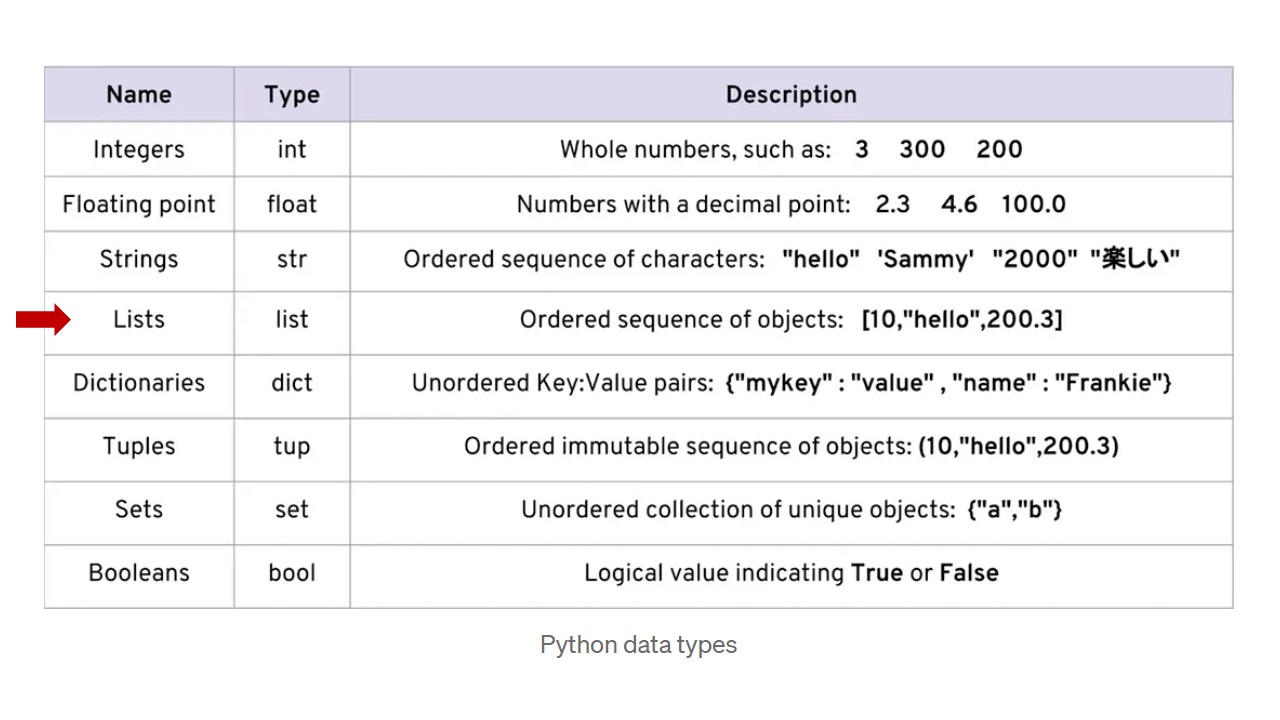

In [3]:
Image('python_data_types.png') if IN_COLAB else display(Image(filename='python_data_types.png'))

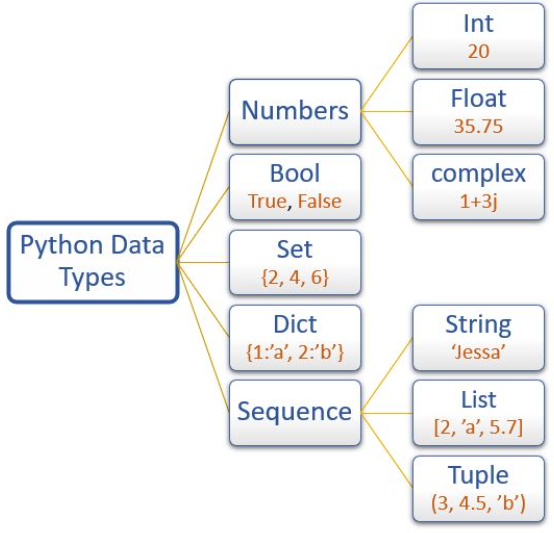

In [4]:
Image('python_data_types2.png') if IN_COLAB else display(Image(filename='python_data_types2.png'))

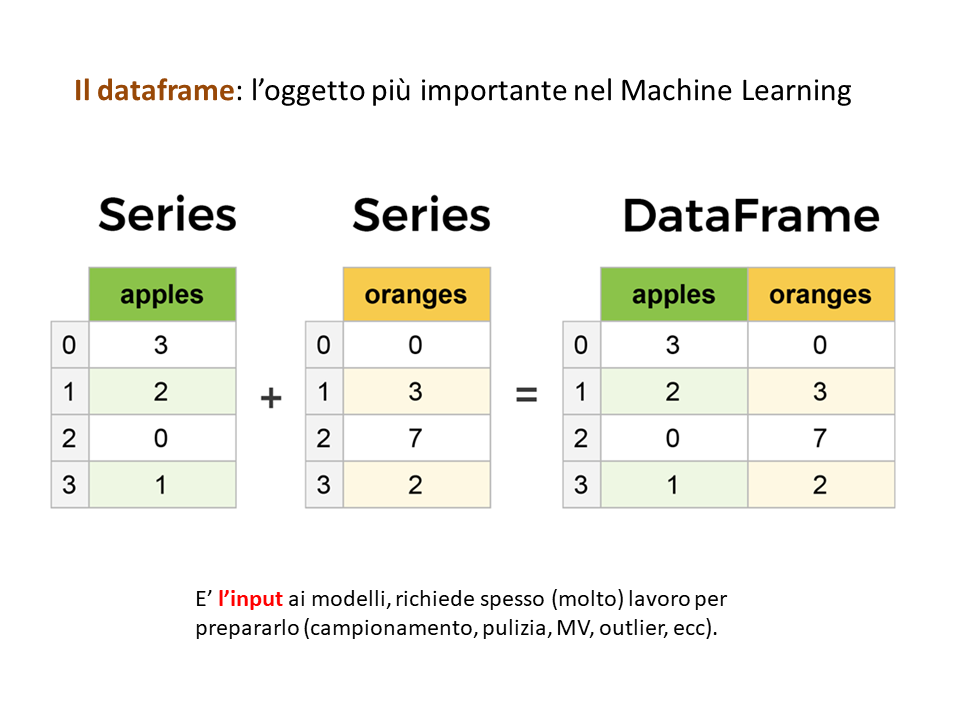

In [ ]:
Image('Series_vs_Dataframe.png') if IN_COLAB else display(Image(filename='Series_vs_Dataframe.png'))

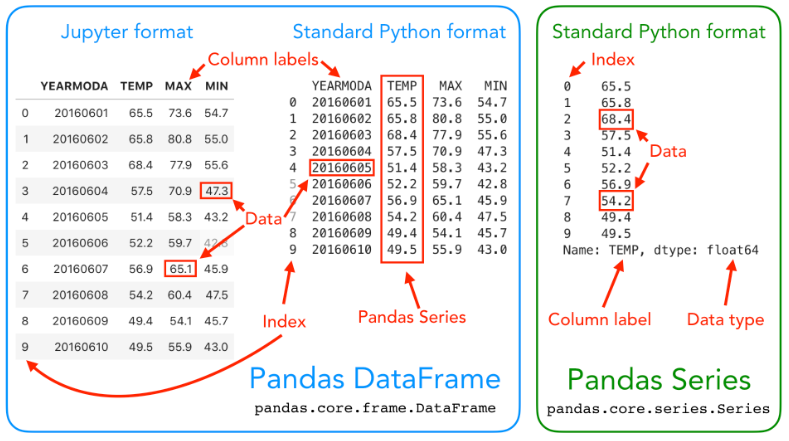

In [5]:
Image('pandas_data_types.png') if IN_COLAB else display(Image(filename='pandas_data_types.png'))

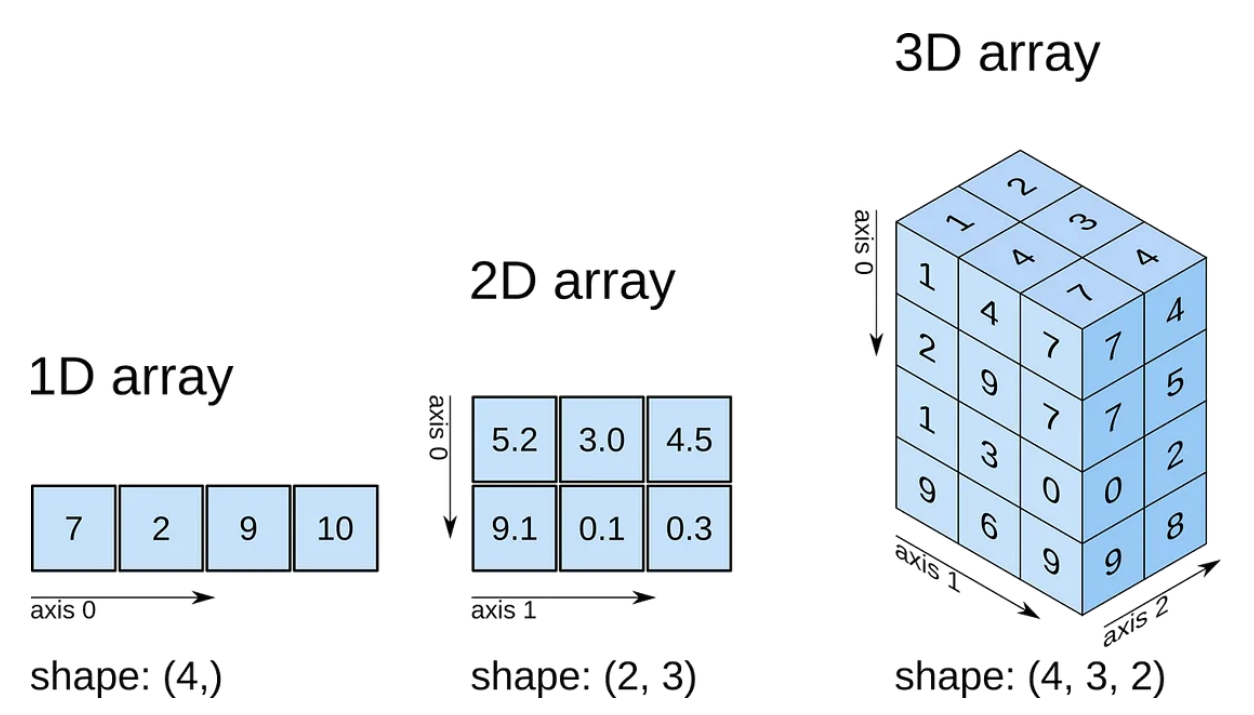

In [6]:
Image('numpy_array.png') if IN_COLAB else display(Image(filename='numpy_array.png'))

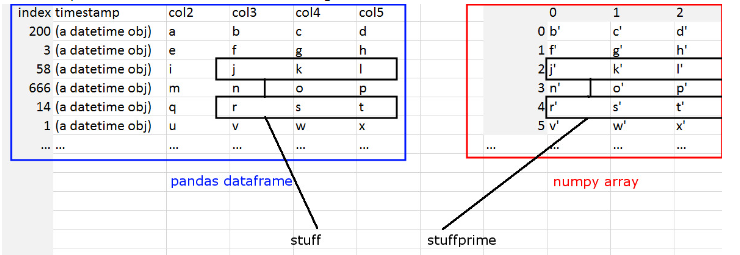

In [7]:
Image('df_vs_array.png') if IN_COLAB else display(Image(filename='df_vs_array.png'))

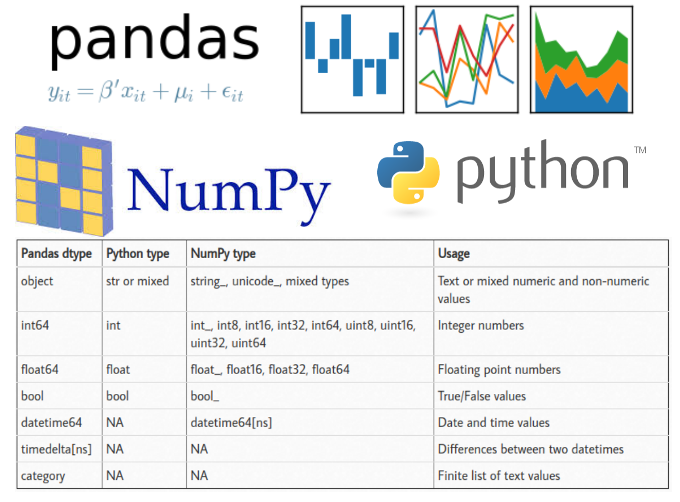

In [8]:
Image('data_types_mapping.png') if IN_COLAB else display(Image(filename='data_types_mapping.png'))